In [ ]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
data = pd.read_csv(url,sep=',')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Quick Look

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


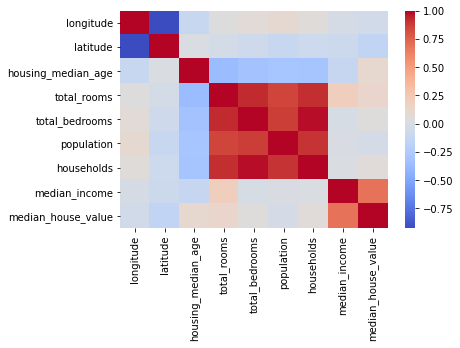

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), cmap= 'coolwarm')

In [ ]:
#data.dropna(how="any", inplace=True)

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].values, data[['median_house_value']].values, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

In [ ]:
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
#from sklearn.neural_network import MLPRegressor

#regr = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=10)
#regr.fit(X_train, y_train)
#y_pred = regr.predict(X_test)

In [ ]:
#from sklearn import metrics

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Mean Absolute Error: 0.140821036364681
# Mean Squared Error: 0.03616517134927797
# Root Mean Squared Error: 0.19017142621665845

### Main

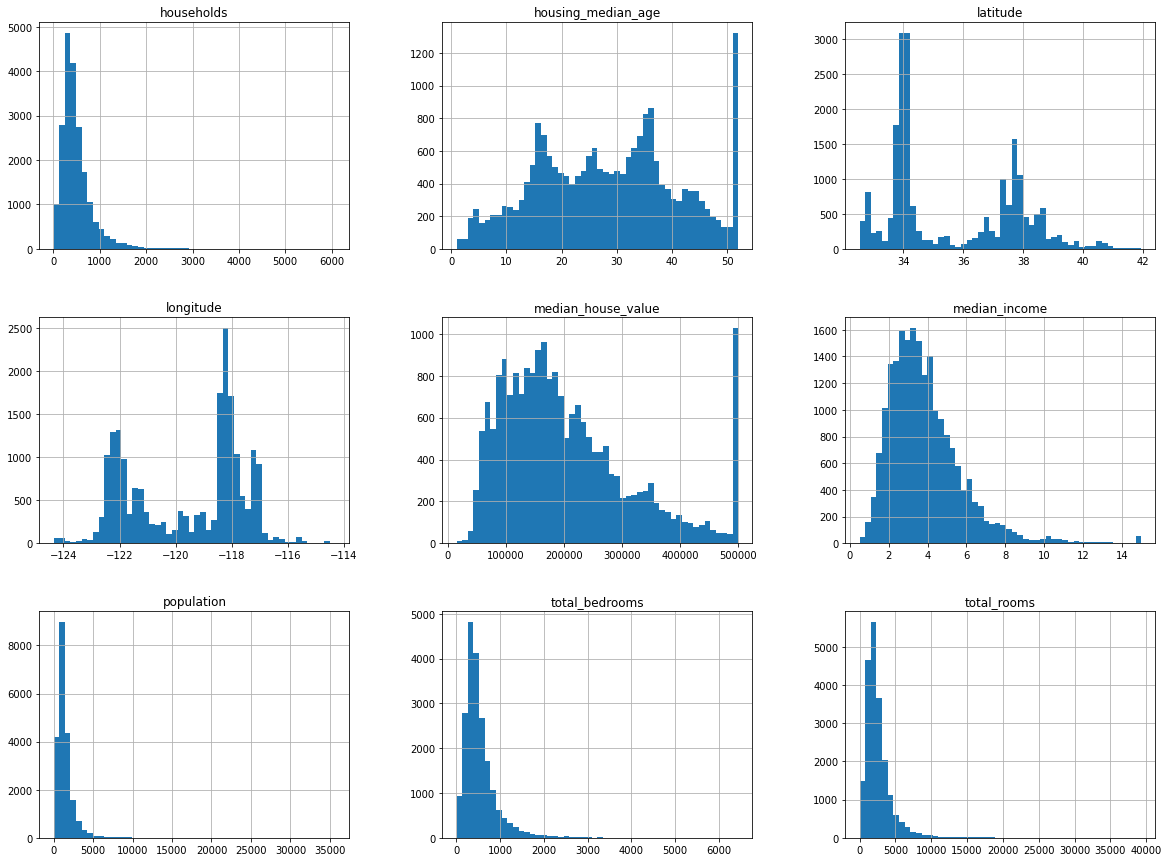

In [ ]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [ ]:
np.random.seed(42)

In [ ]:
def train_test_ratio(x,test_ratio):
  shuffle_data = np.random.permutation(len(x))
  testset_size = int(len(data)*test_ratio)
  testset_indices = shuffle_data[:testset_size]
  trainset_indices = shuffle_data[testset_size:]
  return data.iloc[trainset_indices], data.iloc[testset_indices]

In [ ]:
train_set, test_set = train_test_ratio(data, 0.2)
len(train_set)

16512

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


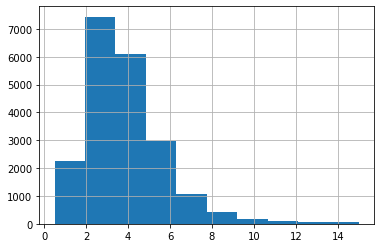

In [ ]:
data["median_income"].hist()

In [ ]:
data["income_cat"] = pd.cut(data["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

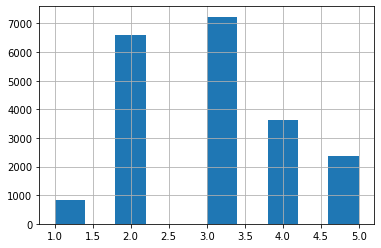

In [ ]:
data["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [ ]:
data["income_cat"].value_counts() / len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


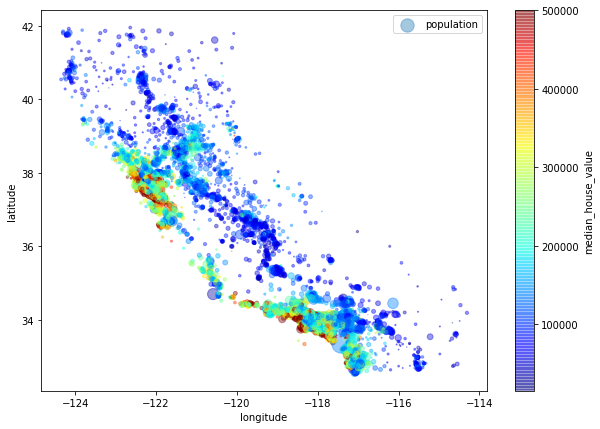

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

In [ ]:
corr_matrix = housing.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6592981908>,
      dtype=object)

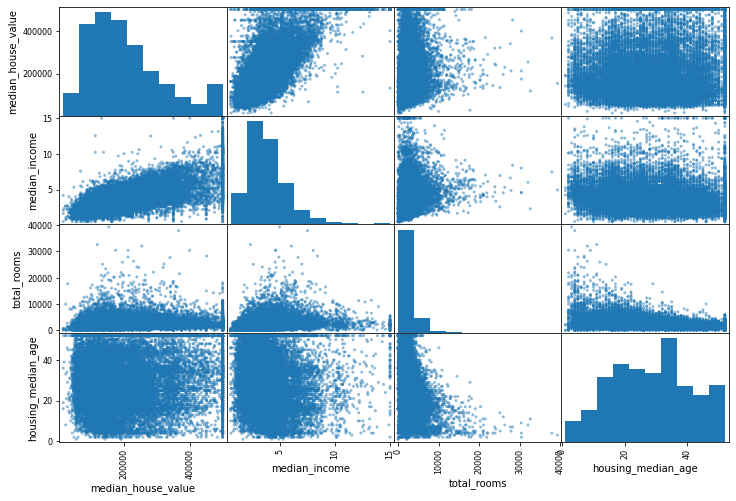

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))

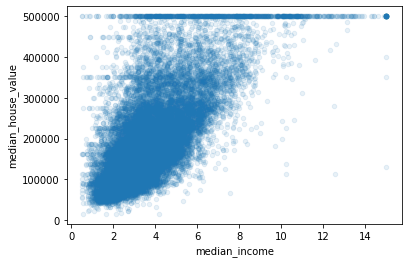

In [ ]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

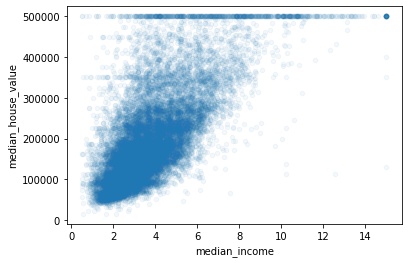

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.05)

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [ ]:
housing['bedrooms_per_room'].median()

0.2030313742002111

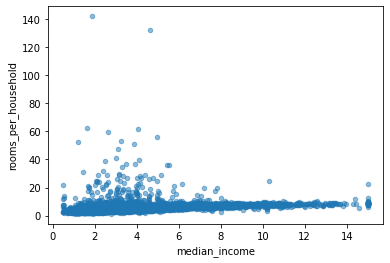

In [ ]:
housing.plot(kind="scatter", x="median_income", y="rooms_per_household",
alpha=0.5)

In [ ]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

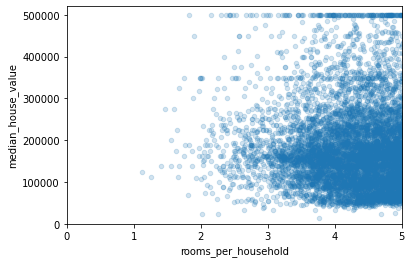

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
sample_incomplete_rows = housing[data.isnull().any(axis=1)].head()
sample_incomplete_rows

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

#median = housing["bedrooms_per_room"].median()
#housing["bedrooms_per_room"].fillna(median, inplace = True)

In [ ]:
data_tr = pd.DataFrame(housing,columns = sample_incomplete_rows.columns, index = housing.index)

In [ ]:
data_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [ ]:
data_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

housing_one_hot = OneHotEncoder().fit_transform(housing_cat)

In [ ]:
housing_one_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr.min(), housing_num_tr.max()

(-2.704541614772787, 107.06025791500451)

single transformer able to handle all columns,
applying the appropriate transformations to each column - 
**ColumnTransformer**
 || Generally used

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num) #all numerical data columns
cat_attribs = ["ocean_proximity"] #column with text data
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs), #text data converted to numerical using one-hot encoding, the different categories are marked as differen vectors
])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


1. ColumnTransformer to the housing data: it applies each transformer to the appropriate
columns and concatenates the outputs along the second axis (the transformers
must return the same number of rows).
2. OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. When there is such a mix of sparse and dense matrices, the Colum
nTransformer estimates the density of the final matrix (i.e., the ratio of nonzero
cells), and it returns a sparse matrix if the density is lower than a given threshold - sparrse-matrix threshold = 0.3

Train a model

Using Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

The main ways to fix **underfitting** are to 
1.select a morepowerful model 
2.To feed the training algorithm with better features
3.To reduce the constraints on the model

1. Select a morepowerful model 
2. To feed the training algorithm with better features
3. To reduce the constraints on the model



### Train a DecisionTreeRegressor
capable of finding
complex nonlinear relationships in the data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Represents that Decision Tree has greatly overfit the data. 

Using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=15)
tree_rmse_scores = np.sqrt(-scores)

It's creating 10 diffrent fold of train data and choosing 1 at a time for validation and 9 other for training. Creates an array of 10 evaluation scores
cv = 10, the number of folds

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [ ]:
display_scores(scores)

Scores: [-5.16039890e+09 -4.24759122e+09 -4.83391071e+09 -5.30174527e+09
 -4.76861846e+09 -4.90032503e+09 -4.88169825e+09 -5.72191599e+09
 -4.92119158e+09 -5.26492518e+09 -4.42737238e+09 -4.91310554e+09
 -5.53038223e+09 -5.05754183e+09 -5.17762609e+09]
Mean: -5007223244.664274
Standard deviation: 368451451.3524032


In [ ]:
scores.mean()

-5007223244.664274

Linear Regression cross validation score

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


Creating a series containing description about scores of linear regression

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
score_series = pd.Series(np.sqrt(-scores))

In [ ]:
score_series.describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

**Info doesn't work for series**

In [ ]:
#score_series.info() 

Scikit-Learn’s GridSearchCV - fiddle with the hyperparameters to find the best possible combination for hyperparameter values.




Use cross-validation to evaluate all the possible combinations of
hyperparameter values.

Using GridSearchCV for finding best possible hyperparameter combination for RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

cv is cross validation; number of folds for cross validation. cv = 5 is five fold cross validation

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("score: ", np.sqrt(-mean_score), " parameters: ", params)

score:  65072.33952759916  parameters:  {'max_features': 2, 'n_estimators': 3}
score:  55730.35283642525  parameters:  {'max_features': 2, 'n_estimators': 10}
score:  53228.72597407534  parameters:  {'max_features': 2, 'n_estimators': 30}
score:  60341.13261350108  parameters:  {'max_features': 4, 'n_estimators': 3}
score:  52966.217788060894  parameters:  {'max_features': 4, 'n_estimators': 10}
score:  50371.78949387711  parameters:  {'max_features': 4, 'n_estimators': 30}
score:  58942.28447349283  parameters:  {'max_features': 6, 'n_estimators': 3}
score:  52098.18678217047  parameters:  {'max_features': 6, 'n_estimators': 10}
score:  49949.52965307689  parameters:  {'max_features': 6, 'n_estimators': 30}
score:  58708.12189607461  parameters:  {'max_features': 8, 'n_estimators': 3}
score:  52420.94175168972  parameters:  {'max_features': 8, 'n_estimators': 10}
score:  50014.468430752044  parameters:  {'max_features': 8, 'n_estimators': 30}
score:  62597.541107517  parameters:  {'bo

In [ ]:
cvres

{'mean_fit_time': array([0.06892343, 0.21063175, 0.61269031, 0.10316873, 0.34313812,
        1.0336247 , 0.14675736, 0.48727164, 1.4648807 , 0.19438801,
        0.63767133, 1.91101193, 0.09935441, 0.33890758, 0.13668027,
        0.4474102 , 0.16872234, 0.56336699]),
 'mean_score_time': array([0.00344167, 0.01025391, 0.02972951, 0.0035975 , 0.01052332,
        0.02973332, 0.00366788, 0.01048808, 0.03067732, 0.003828  ,
        0.01050692, 0.02988491, 0.00406117, 0.01283846, 0.00396485,
        0.01232309, 0.00388536, 0.01293402]),
 'mean_test_score': array([-4.23440937e+09, -3.10587223e+09, -2.83329727e+09, -3.64105229e+09,
        -2.80542023e+09, -2.53731718e+09, -3.47419290e+09, -2.71422107e+09,
        -2.49495551e+09, -3.44664358e+09, -2.74795513e+09, -2.50144705e+09,
        -3.91845215e+09, -2.94888739e+09, -3.59511149e+09, -2.78576160e+09,
        -3.46490301e+09, -2.68751125e+09]),
 'mean_train_score': array([-1.11502196e+09, -5.81848779e+08, -4.32879440e+08, -9.61414830e+08,
 

Creating a dataframe for the cvres

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068923,0.010808,0.003442,0.000286,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.072456e+09,-4.100988e+09,-4.287822e+09,-4.079069e+09,-4.631711e+09,-4.234409e+09,2.139450e+08,18,-1.101434e+09,-1.048717e+09,-1.120450e+09,-1.147261e+09,-1.157249e+09,-1.115022e+09,3.855617e+07
1,0.210632,0.002174,0.010254,0.000377,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.983356e+09,-3.189678e+09,-3.209320e+09,-2.903114e+09,-3.243893e+09,-3.105872e+09,1.363054e+08,11,-5.974953e+08,-5.592321e+08,-5.724731e+08,-6.064618e+08,-5.735817e+08,-5.818488e+08,1.742627e+07
2,0.612690,0.005750,0.029730,0.000490,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.706958e+09,-2.946588e+09,-2.916115e+09,-2.618124e+09,-2.978700e+09,-2.833297e+09,1.435944e+08,9,-4.500158e+08,-4.390848e+08,-4.207726e+08,-4.292850e+08,-4.252391e+08,-4.328794e+08,1.048841e+07
3,0.103169,0.001760,0.003597,0.000245,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.559244e+09,-3.484926e+09,-3.650164e+09,-3.616059e+09,-3.894869e+09,-3.641052e+09,1.387072e+08,16,-9.840933e+08,-9.256221e+08,-9.573738e+08,-9.241838e+08,-1.015801e+09,-9.614148e+08,3.508784e+07
4,0.343138,0.005853,0.010523,0.000340,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.701470e+09,-2.866963e+09,-3.012143e+09,-2.523506e+09,-2.923020e+09,-2.805420e+09,1.735699e+08,8,-5.440733e+08,-5.305057e+08,-5.242626e+08,-5.182170e+08,-5.356420e+08,-5.305401e+08,8.949242e+06
5,1.033625,0.009637,0.029733,0.000823,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.375534e+09,-2.633384e+09,-2.662269e+09,-2.377248e+09,-2.638151e+09,-2.537317e+09,1.317613e+08,3,-4.011069e+08,-3.851199e+08,-4.047451e+08,-3.926939e+08,-3.896007e+08,-3.946533e+08,7.262875e+06
6,0.146757,0.002522,0.003668,0.000188,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.448515e+09,-3.561884e+09,-3.526258e+09,-3.269361e+09,-3.564946e+09,-3.474193e+09,1.106815e+08,14,-9.130125e+08,-9.093914e+08,-9.412435e+08,-8.972989e+08,-9.426387e+08,-9.207170e+08,1.809937e+07
7,0.487272,0.009289,0.010488,0.000437,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.544597e+09,-2.751362e+09,-2.953250e+09,-2.561231e+09,-2.760666e+09,-2.714221e+09,1.502330e+08,5,-5.171471e+08,-5.109234e+08,-5.009539e+08,-5.115187e+08,-4.986045e+08,-5.078295e+08,6.962416e+06
8,1.464881,0.013349,0.030677,0.001816,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.316751e+09,-2.541304e+09,-2.625054e+09,-2.403582e+09,-2.588087e+09,-2.494956e+09,1.164934e+08,1,-3.930839e+08,-3.768309e+08,-3.798320e+08,-3.916659e+08,-3.821480e+08,-3.847121e+08,6.495311e+06
9,0.194388,0.002753,0.003828,0.000299,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.410291e+09,-3.600730e+09,-3.563990e+09,-3.231869e+09,-3.426339e+09,-3.446644e+09,1.306713e+08,12,-8.876280e+08,-9.230234e+08,-8.558526e+08,-8.613841e+08,-8.727540e+08,-8.801284e+08,2.404691e+07


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.34156606e-02, 7.00734751e-02, 4.33829648e-02, 1.72810824e-02,
       1.77558727e-02, 1.83247696e-02, 1.66599989e-02, 3.10394325e-01,
       5.75492101e-02, 1.09524701e-01, 9.83295280e-02, 9.26364710e-03,
       1.50585715e-01, 7.48682265e-05, 2.33196026e-03, 5.05222018e-03])

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [ ]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [ ]:
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse = True)

[(0.31039432535505734, 'median_income'),
 (0.15058571541098129, 'NEAR OCEAN'),
 (0.10952470107763435, 'INLAND'),
 (0.0983295279941802, 'ISLAND'),
 (0.07341566062707962, 'longitude'),
 (0.07007347514894781, 'latitude'),
 (0.05754921006017937, '<1H OCEAN'),
 (0.04338296484517934, 'housing_median_age'),
 (0.01832476962943212, 'population'),
 (0.017755872740664837, 'total_bedrooms'),
 (0.017281082438539475, 'total_rooms'),
 (0.016659998911000447, 'households'),
 (0.009263647096663219, 'NEAR BAY')]

In [ ]:
model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
f_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,f_prediction)
final_rmse = np.sqrt(final_mse)

In [ ]:
print(len(y_test)," ",len(X_test))

4128   4128


In [ ]:
final_mse = final_mse/len(X_test)
final_mse

568318.5814985363

In [ ]:
final_rmse = final_rmse/len(y_test)
final_rmse

11.733459633689485

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (f_prediction - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))) # didn't understand

array([46466.7853743 , 50327.68687145])

In [ ]:
import sklearn
sklearn.metrics.accuracy_score(y_test.values, np.ceil(f_prediction), normalize=True)

0.0012112403100775194

In [ ]:
housing_prepared.shape

(16512, 16)

# Training a Neural Network
### using tensorflow and keras

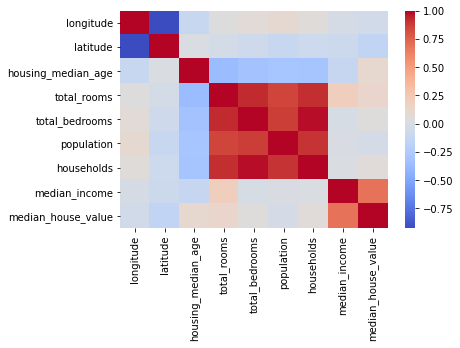

In [ ]:
sns.heatmap(data.corr(), cmap= 'coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.30, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((8090, 16), (8090,), (3468, 16), (3468,), (4954, 16), (4954,))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers

model = tf.keras.Sequential([
layers.Dense(64, activation='relu',input_shape = x_train.shape),
layers.Dense(128, activation='relu'),
layers.Dense(35, activation='relu'),
layers.Dense(1,activation='linear')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
              loss='mse',       # mean squared error
              #metrics=['mae'])  # mean absolute error
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8090, 64)          1088      
_________________________________________________________________
dense_5 (Dense)              (None, 8090, 128)         8320      
_________________________________________________________________
dense_6 (Dense)              (None, 8090, 35)          4515      
_________________________________________________________________
dense_7 (Dense)              (None, 8090, 1)           36        
Total params: 13,959
Trainable params: 13,959
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/50
253/253 [==============================] - 1s 3ms/step - loss: 7247682560.0000 - root_mean_squared_error: 85133.3203 - val_loss: 4509330432.0000 - val_root_mean_squared_error: 67151.5469
Epoch 2/50
253/253 [==============================] - 1s 3ms/step - loss: 4832738304.0000 - root_mean_squared_error: 69517.8984 - val_loss: 4271109888.0000 - val_root_mean_squared_error: 65353.7305
Epoch 3/50
253/253 [==============================] - 1s 3ms/step - loss: 4651308032.0000 - root_mean_squared_error: 68200.5000 - val_loss: 4012516096.0000 - val_root_mean_squared_error: 63344.4258
Epoch 4/50
253/253 [==============================] - 1s 3ms/step - loss: 5282493952.0000 - root_mean_squared_error: 72680.7656 - val_loss: 4503648256.0000 - val_root_mean_squared_error: 67109.2266
Epoch 5/50
253/253 [==============================] - 1s 3ms/step - loss: 4344117760.0000 - root_mean_squared_error: 65909.9219 - val_loss: 3939115776.0000 - val_root_mean_squared_error: 62762.3750
Epoch 6/50

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


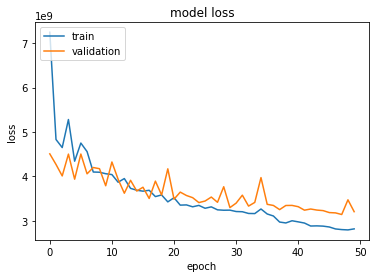

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

155/155 [==============================] - 0s 2ms/step - loss: 3192473344.0000 - root_mean_squared_error: 56501.9766


[3192473344.0, 56501.9765625]

In [ ]:
house_test = strat_test_set.drop("median_house_value", axis=1)
housing_test = full_pipeline.fit_transform(house_test)

In [ ]:
prediction_1 = model.fit(housing_prepared,housing_labels,epochs=50, batch_size=32)

Epoch 1/50
516/516 [==============================] - 1s 2ms/step - loss: 6330786816.0000 - root_mean_squared_error: 79566.2422
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 4873386496.0000 - root_mean_squared_error: 69809.6484
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 5015432704.0000 - root_mean_squared_error: 70819.7188
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 4296697856.0000 - root_mean_squared_error: 65549.2031
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 4189431552.0000 - root_mean_squared_error: 64725.8164
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 3897742592.0000 - root_mean_squared_error: 62431.9023
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 3712388352.0000 - root_mean_squared_error: 60929.3711
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 3647622912.0000 - root_mean_sq

In [ ]:
c = strat_test_set["median_house_value"]
c.shape,prediction_1.shape

AttributeError: ignored

In [ ]:
mse = mean_squared_error(strat_test_set["median_house_value"], prediction_1)
rmse = np.sqrt(mse)
rmse

TypeError: ignored

In [ ]:
model.evaluate(housing_test, c)

129/129 [==============================] - 0s 1ms/step - loss: 20152780800.0000 - root_mean_squared_error: 141960.4844


[20152780800.0, 141960.484375]